In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


df = pd.read_csv('Dataset_temp.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

del df["# STN"]

df['DateTime'] = df['YYYYMMDD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
del df["YYYYMMDD"]


maandelijkse_temperatuur_dataset = df.groupby(pd.PeriodIndex(df['DateTime'], freq="M"))[['TG', 'TN', 'TX']].mean().div(10).reset_index()
maandelijkse_temperatuur_dataset 

#Gemiddelde temperatuur per maand vanaf januari 2000
# TG = gem. temperatuur. 
# TN = minimum temperatuur. 
# TX = maximum temperatuur,

,DateTime,TG,TN,TX
0,2000-01,4.329032,1.729032,6.561290
1,2000-02,5.855172,2.537931,8.941379
2,2000-03,6.796774,3.361290,10.112903
3,2000-04,9.986667,5.186667,14.753333
4,2000-05,14.732258,9.274194,20.022581
...,...,...,...,...
268,2022-05,14.041935,7.664516,19.587097
269,2022-06,17.076667,10.923333,22.120000
270,2022-07,18.574194,11.841935,23.674194
271,2022-08,19.977419,13.122581,25.929032


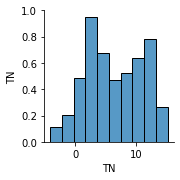

In [61]:
sns.pairplot(maandelijkse_temperatuur_dataset[['DateTime','TN',]])

# Hier is een pairplot weergegeven


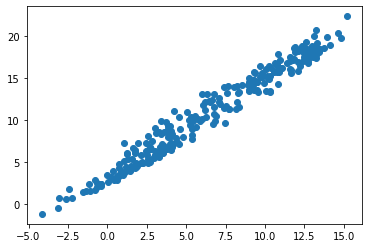

In [62]:
plt.scatter(maandelijkse_temperatuur_dataset['TN'], maandelijkse_temperatuur_dataset['TG'])

# Hier is een scatterplot weergegeven


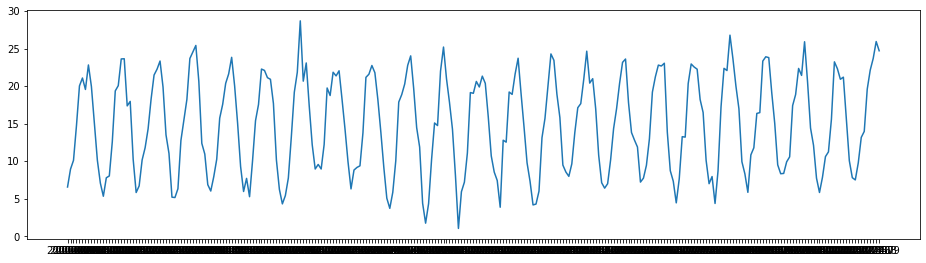

In [64]:
data = pd.read_csv('Dataset_temperatuur_done.csv')


plt.figure(figsize=(16, 4.2))
x = range(len(data['DateTime']))
plt.plot(x, data['TX'])
plt.xticks(x, data['DateTime'])
plt.show()

# Hier is een lijngrafiek weergegeven van de maandelijkse maximum temperatuur vanaf januari 2000 tot september 2022


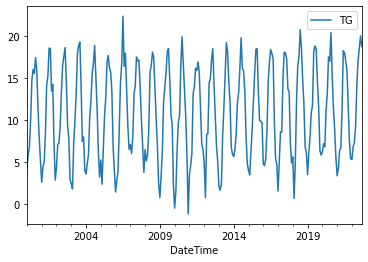

In [65]:

maandelijkse_temperatuur_dataset.plot(x='DateTime',y='TG')
plt.show()

# Hier is een lijngrafiek weergegeven van de maandelijkse gemiddelde temperatuur vanaf januari 2000 tot september 2022


In [66]:
maandelijkse_temperatuur_dataset['TG'].corr(maandelijkse_temperatuur_dataset['TN'])

# Hieronder worden de correlaties weergegeven van de 3 variabelen.

0.9826231102044918

In [67]:
maandelijkse_temperatuur_dataset['TG'].corr(maandelijkse_temperatuur_dataset['TX'])

0.9931674975595015

In [68]:
maandelijkse_temperatuur_dataset['TX'].corr(maandelijkse_temperatuur_dataset['TN'])

0.9562339720034511

In [200]:
Energy_dataset = pd.read_csv('MontlyEnergy.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

# Hieronder zijn de correlaties met de 3 variabelen en het energieverbruik berekend. 

In [201]:
maandelijkse_temperatuur_dataset['TX'].corr(Energy_dataset['NettoVerbruikBerekend_30'])

-0.6760629563133612

In [202]:
maandelijkse_temperatuur_dataset['TN'].corr(Energy_dataset['NettoVerbruikBerekend_30'])

-0.5739957578897353

In [203]:
maandelijkse_temperatuur_dataset['TG'].corr(Energy_dataset['NettoVerbruikBerekend_30']) # Negatieve correlaties!

-0.6407231156372836

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [74]:
maandelijkse_temperatuur_dataset.columns

# kolommen van de temperatuur dataset

Index(['DateTime', 'TG', 'TN', 'TX'], dtype='object')

In [75]:
maandelijkse_temperatuur_dataset['TG'].describe()

# beschrijving van de temperatuur dataset

count    273.000000
mean      10.789061
std        5.467627
min       -1.145161
25%        6.158065
50%       10.493548
75%       15.816667
max       22.309677
Name: TG, dtype: float64

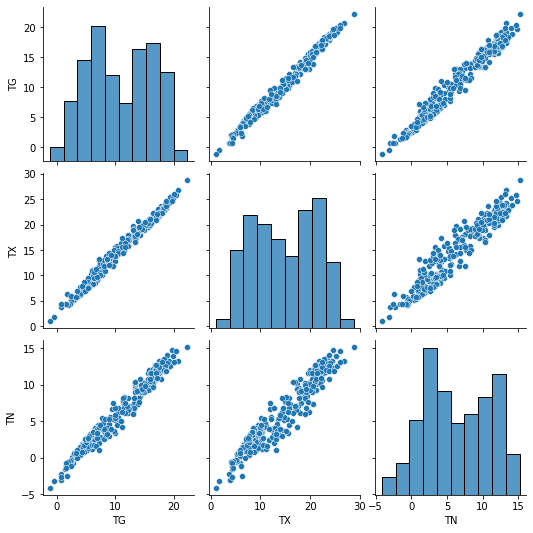

In [76]:
sns.pairplot(maandelijkse_temperatuur_dataset[['TG', 'TX', 'TN']])

#pairplot van de temperatuur dataset

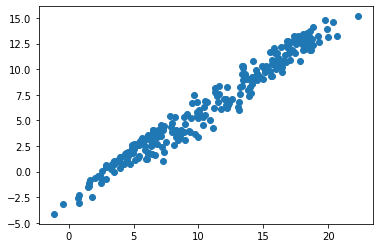

In [77]:
plt.scatter(maandelijkse_temperatuur_dataset['TG'], maandelijkse_temperatuur_dataset['TN'])

In [78]:
X = maandelijkse_temperatuur_dataset[['TN']].iloc[:,:1].values
y = maandelijkse_temperatuur_dataset[['TG']].iloc[:,:1].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [80]:
reg = LinearRegression()

In [211]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

# de mean squared error van het model

0.9130115926789666

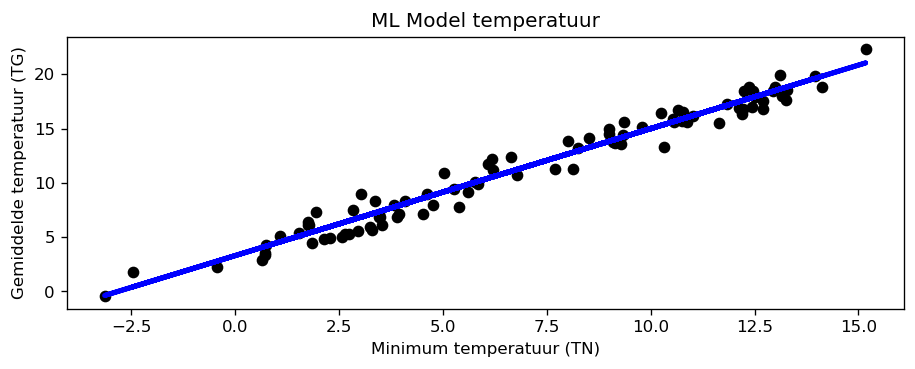

<Figure size 1080x360 with 0 Axes>

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.ylabel('Gemiddelde temperatuur (TG)')
plt.xlabel('Minimum temperatuur (TN)')
plt.title("ML Model temperatuur")plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.figure()

plt.show()

# Hieronder is een model getraind met de minimum temperatuur op de X-as en de gemiddelde temperatuur op de y-as

#BEWIJSSTUK EINDIGT HIER; Hasan's: Productreview 1; Sprint 1; versie 3; (Gefeedbackt door Nikita in versie 2)


In [139]:
y_pred.ndim 

2

In [171]:
X_test.ndim

2

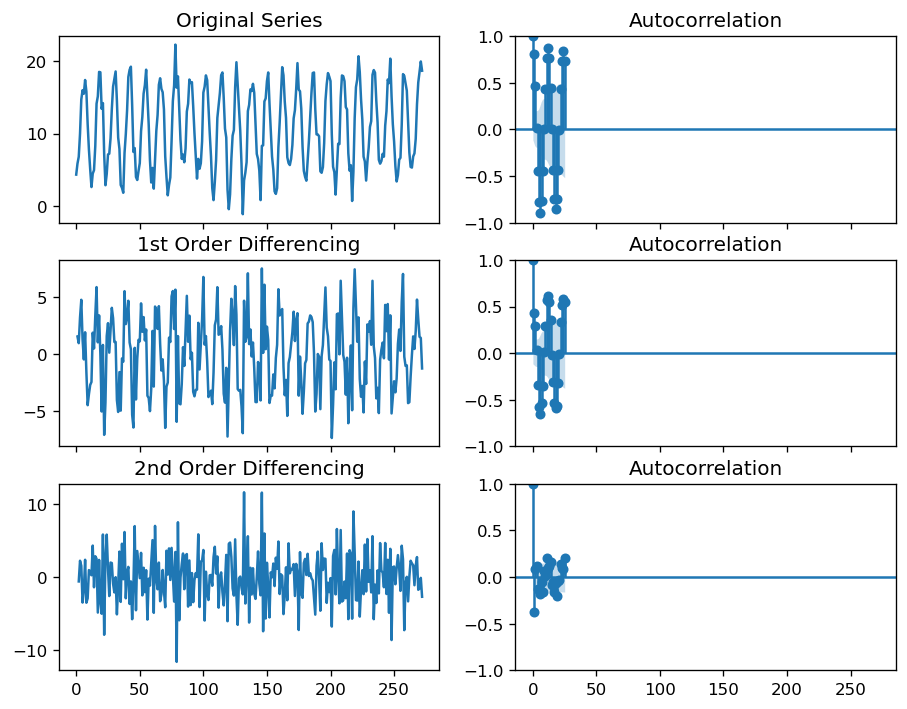

In [189]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(maandelijkse_temperatuur_dataset['TG']); axes[0, 0].set_title('Original Series')

plot_acf(maandelijkse_temperatuur_dataset['TG'], ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(maandelijkse_temperatuur_dataset['TG'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(maandelijkse_temperatuur_dataset['TG'].diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(maandelijkse_temperatuur_dataset['TG'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(maandelijkse_temperatuur_dataset['TG'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/Users/hasankaracayir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


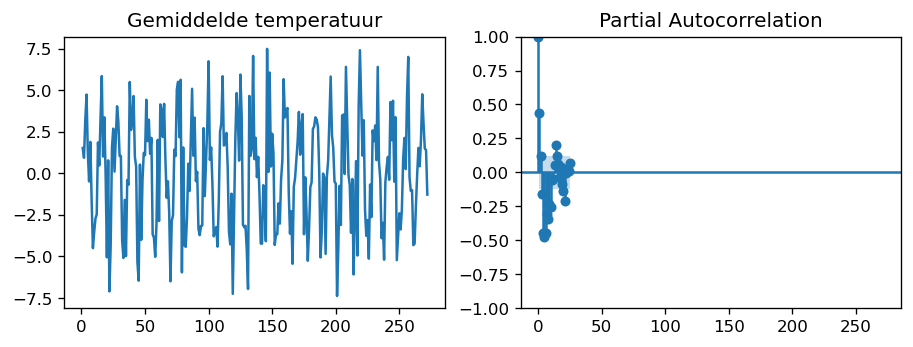

In [212]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(maandelijkse_temperatuur_dataset['TG'].diff()); axes[0].set_title('Gemiddelde temperatuur')
axes[1].set(ylim=(0,5))
plot_pacf(maandelijkse_temperatuur_dataset['TG'].diff().dropna(), ax=axes[1])

plt.show()

<AxesSubplot:xlabel='DateTime'>

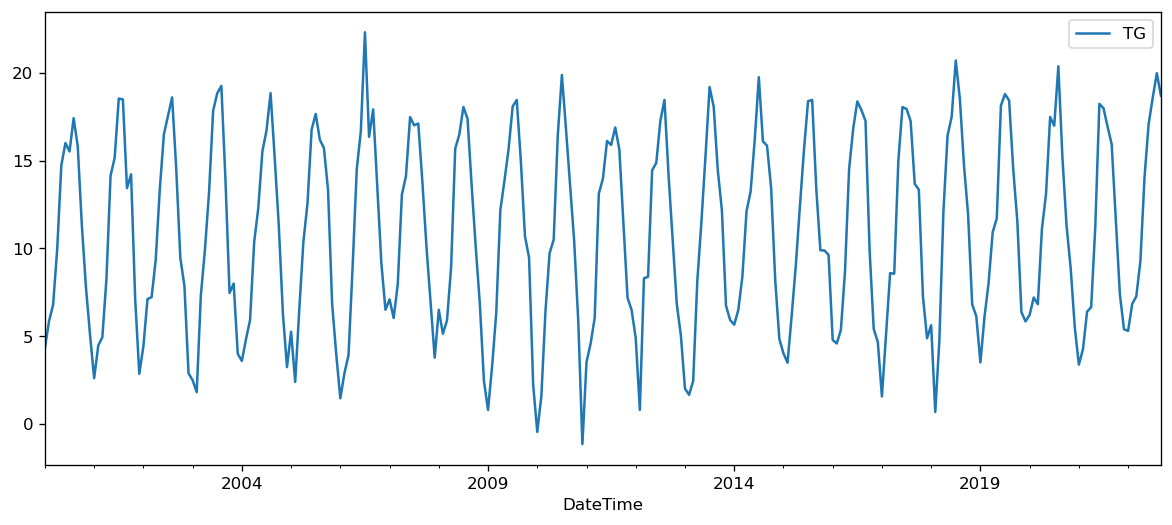

In [218]:
maandelijkse_temperatuur_dataset.plot(figsize=(12,5), x='DateTime',y='TG')

In [227]:
# Vanaf hier gaan we verder met het ARIMA model. Met de Youtube video:
#https://www.youtube.com/watch?v=8FCDpFhd1zk&ab_channel=NachiketaHebbar

from statsmodels.tsa.stattools import adfuller
def ad_test(maandelijkse_temperatuur_dataset):
    test=adfuller(maandelijkse_temperatuur_dataset, autolag = 'AIC')
    print ('P-value: ', test[1])
    for key, val in test[4].items():
        print('\t', key,':',val)

In [233]:
ad_test(maandelijkse_temperatuur_dataset['TG']) #P-value is 0.00559 dat is goed!

P-value:  0.005596452228761057
	 1% : -3.4561550092339512
	 5% : -2.8728972266578676
	 10% : -2.5728222369384763


In [238]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [242]:
arima_fit = auto_arima(maandelijkse_temperatuur_dataset['TG'], trace=True,
                       supress_warnings=True)

arima_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1705.308, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1408.287, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1482.399, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2137.619, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.325, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1217.235, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1132.397, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1097.787, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1091.516, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1095.210, Time=0.30 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=1099.643, Time=0.36 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1125.692, Time=0.30 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1146.037, Time=0.27 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  273
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -537.758
Date:                Mon, 10 Oct 2022   AIC                           1091.516
Time:                        15:15:13   BIC                           1120.392
Sample:                             0   HQIC                          1103.107
                                - 273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.6990      1.064      7.234      0.000       5.613       9.785
ar.L1          0.8420      0.138      6.108      0.000       0.572       1.112
ar.L2         -0.1039      0.112     -0.931      0.352      -0.323       0.115
ar.L3          0.0147      0.083      0.177      0.860      -0.148       0.177
ar.L4         -0.2656      0.082     -3.250      0.001      -0.426      -0.105
ar.L5         -0.2034      0.098     -2.075      0.038      -0.396      -0.011
ma.L1         -0.3738      0.130     -2.877      0.004      -0.628      -0.119
sigma2         2.9565      0.271     10.921      0.000       2.426       3.487
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.90   Prob(JB):                         0.75
Heteroskedasticity (H):               1.14   Skew:                            -0.04
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [253]:
from statsmodels.tsa.arima_model import ARIMA

print(maandelijkse_temperatuur_dataset.shape)
train=maandelijkse_temperatuur_dataset.iloc[:240]
test=maandelijkse_temperatuur_dataset.iloc[-33:]
print(train.shape,test.shape)

(273, 4)
(240, 4) (33, 4)


In [261]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(5,0,1))
result = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).